In [1]:
import os

# CHANGE WORKING DIRECTORY TO ROOT
current_dir = os.path.basename(os.getcwd())
if current_dir == "src":
    os.chdir("..") # Move up by 1
elif os.path.basename(os.getcwd()) == "bai-thesis-nlp":  
    pass # If already at root, stay there
else:
    os.chdir("../..") # Move up by 2 otherwise

import pandas as pd
from src._utils._helpers import basic_analysis,  get_generated_examples_df

REAL DATA


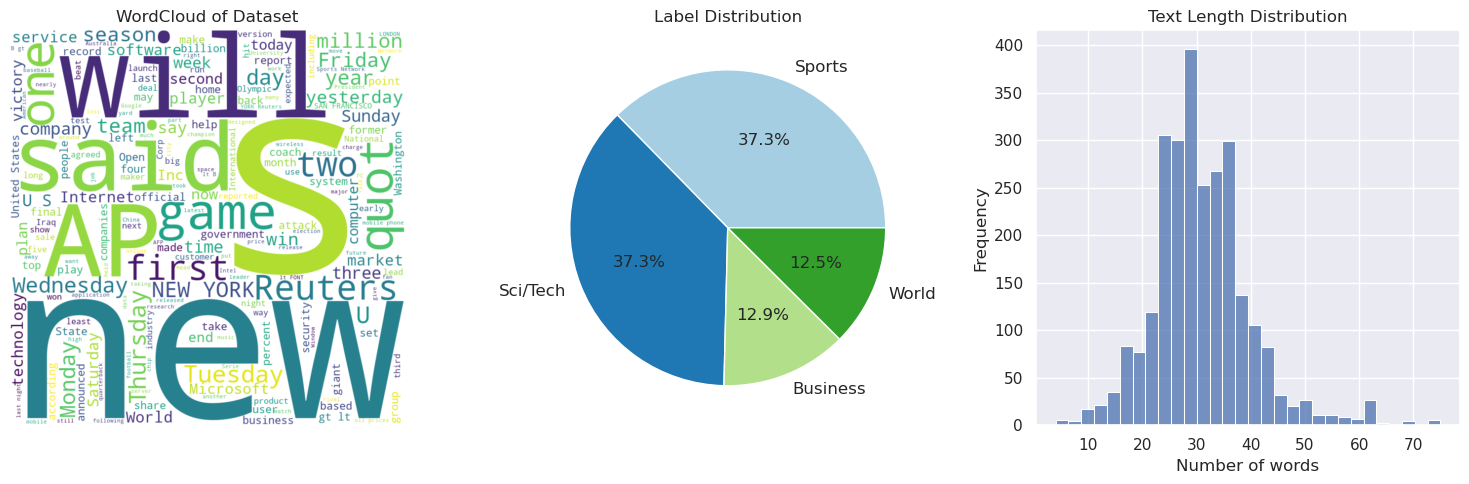

Number of train samples: 2679
Set of labels: {'Sci/Tech', 'Business', 'World', 'Sports'}
Number of labels: 4


In [2]:
print("REAL DATA")
df_real = pd.read_csv("real_data/train/agnewstrainAll.csv")
df_real = df_real.rename(columns={"2": "text", "3": "label"})
basic_analysis(df_real, print_count_statistics=False, print_missing_values=False)

In [3]:
path = "synthetic_data/datasets/syn_agnews_baseline_500.json"
df_baseline, metadata = get_generated_examples_df(path)
display(df_baseline.head())
print("Columns :", df_baseline.columns.to_list())
print("Labels  :", df_baseline['label'].unique())

,text,label
0,A tech startup has raised itsprofile with a ne...,Business
1,Economic reports indicate a rise in consumer c...,Business
2,"A breakthrough in AI has been announced, poten...",Sci/Tech
3,Quantum computing advancements are being highl...,Sci/Tech
4,Medical advancements in cancer treatments are ...,Sci/Tech


Columns : ['text', 'label']
Labels  : ['Business' 'Sci/Tech' 'Sports' 'World']


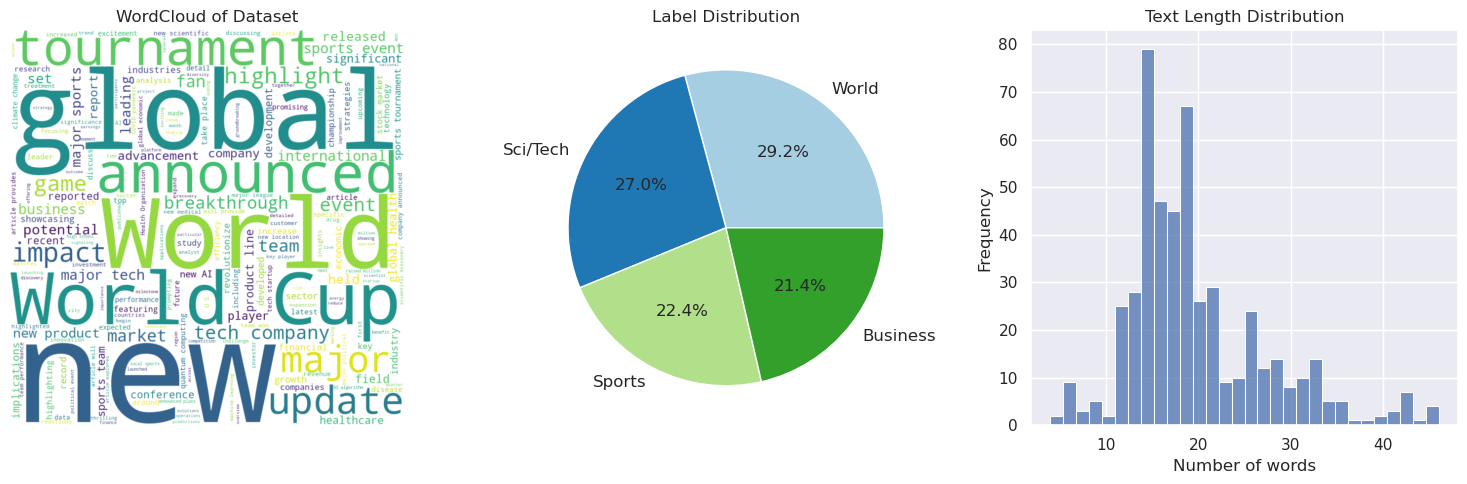

Number of train samples: 500
Set of labels: {'Sci/Tech', 'Business', 'World', 'Sports'}
Number of labels: 4


In [4]:
basic_analysis(df_baseline, print_count_statistics=False, print_missing_values=False)

In [5]:
path = "synthetic_data/datasets/syn_agnews_targeted+tags_500.json"
df_targeted, metadata = get_generated_examples_df(path)
display(df_targeted.head())
print("Columns :", df_targeted.columns.to_list())
print("Labels  :", df_targeted['label'].unique())

,text,label,phenomena
0,A recent Market phenomenon has sparked interes...,Business,"[Market Phenomenon, Economic Growth]"
1,"AI is revolutionizing various industries, but ...",Sci/Tech,"[AI Impact, Cybersecurity Threats]"
2,The Olympics are bringing together athletes an...,World,"[Olympic Events, Conflict Reporting]"
3,"In the world of sports, record-breaking perfor...",World,"[Rivalry Highlights, Olympic Records]"
4,"A startup is raising funds, but regulations ar...",Business,"[Startup Growth, Economic Challenges]"


Columns : ['text', 'label', 'phenomena']
Labels  : ['Business' 'Sci/Tech' 'World' 'Sports']


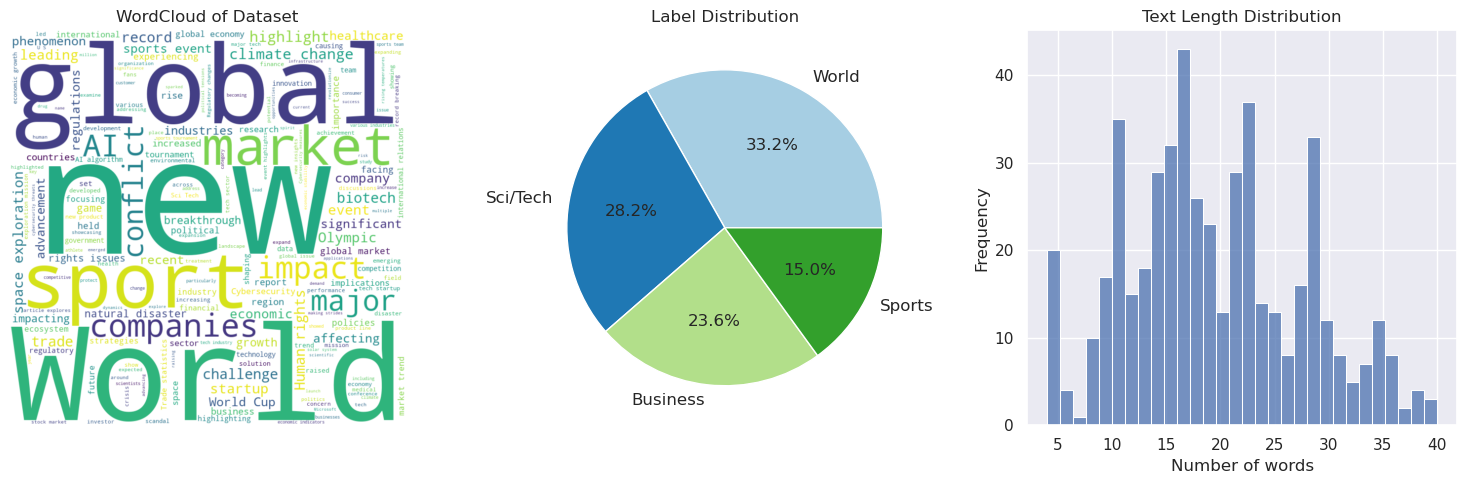

Number of train samples: 500
Set of labels: {'Sci/Tech', 'Business', 'World', 'Sports'}
Number of labels: 4


In [ ]:
basic_analysis(df_targeted, print_count_statistics=False, print_missing_values=False)

Number of unique phenomena: 444


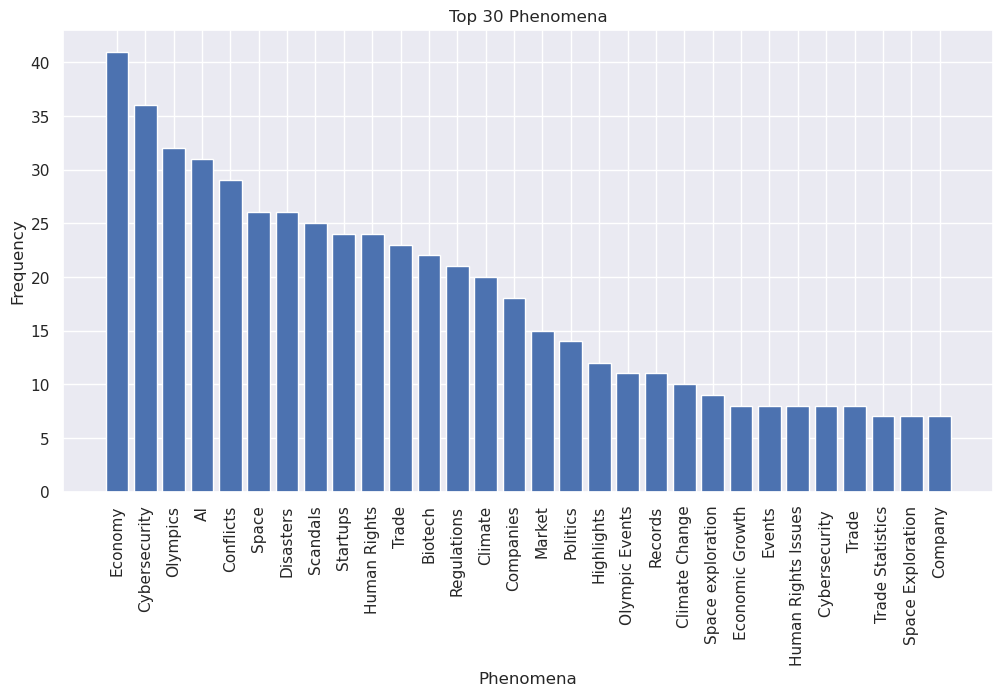

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

# Extract all phenomena into a single list
all_phenomena = [phenomenon for sublist in df_targeted['phenomena'] for phenomenon in sublist]
phenomena_counts = Counter(all_phenomena)
print(f"Number of unique phenomena: {len(phenomena_counts)}")

# plot top n phenomena
n = 30
top_phenomena = phenomena_counts.most_common(n)

plt.figure(figsize=(12, 6))
plt.bar([phenomenon for phenomenon, count in top_phenomena], [count for phenomenon, count in top_phenomena])
plt.xlabel('Phenomena')
plt.ylabel('Frequency')
plt.title(f'Top {n} Phenomena')
plt.xticks(rotation=90)
plt.show()